In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [2]:
import pandas as pd
#This imports the pandas library and aliases it as pd. pandas is commonly used for data manipulation and analysis in Python.
from sklearn.model_selection import train_test_split
#this imports the train_test_split function from the model_selection module of scikit-learn. It's used to split datasets into training and testing sets for machine learning.
from sklearn.preprocessing import StandardScaler
#This imports the StandardScaler class from the preprocessing module of scikit-learn. It's used to standardize features by removing the mean and scaling to unit variance.
from sklearn.pipeline import Pipeline
#This imports the Pipeline class from the pipeline module of scikit-learn. Pipelines are used to chain multiple processing steps together, such as preprocessing and modeling, into a single object.
from sklearn.compose import ColumnTransformer
#This imports the ColumnTransformer class from the compose module of scikit-learn. It's used to apply different preprocessing steps to different columns of the dataset.
from sklearn.metrics import mean_squared_error
#This imports the mean_squared_error function from the metrics module of scikit-learn. It's used to calculate the mean squared error, a common metric for evaluating regression models.
import matplotlib.pyplot as plt
#This imports the pyplot module from the matplotlib library and aliases it as plt. matplotlib.pyplot provides a MATLAB-like plotting interface and is commonly used for creating visualizations.
from sklearn.model_selection import GridSearchCV
#This imports the GridSearchCV class from the model_selection module of scikit-learn. GridSearchCV is used to perform an exhaustive search over a specified parameter grid for an estimator.
from sklearn.metrics import accuracy_score
#This imports the accuracy_score function from the metrics module of scikit-learn. It's used to calculate the accuracy of classification models by comparing predicted labels to true labels.

# Reading Training Data:
****We start by loading our training data from a CSV file. The file contains information about recipes and their associated ratings.

# Displaying the First Few Rows:
****After loading the data, we take a quick look at the first few rows to understand its structure and see what kind of information it contains.

# Checking for Missing Values:
****It's important to ensure that our data is clean and complete. We check if there are any missing values (or NaNs) in our dataset, column-wise. This helps us identify if there are any areas that need attention, such as data imputation or removal.

# Displaying Data Types:
****Understanding the data types of each column is crucial for preprocessing and analysis. This step shows us what types of data are present in each column, whether they're numerical (like integers or floats) or categorical (like strings or objects). It gives us insights into how we might need to handle each column during data processing.

In [3]:
file_name = '/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv'

# Read the training data from the CSV file
df = pd.read_csv(file_name)

# Display the first few rows of the dataframe
df.head()

# Check for missing values in the dataframe
null = df.isnull().sum()
print(null)

# Display the data types of each column in the dataframe
df.dtypes

file_name = '/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv'

# Read the test data from the CSV file
test = pd.read_csv(file_name)

# Display the first few rows of the dataframe
df.head()

# Check for missing values in the test dataframe
null = test.isnull().sum()
print(null)

# Display the data types of each column in the dataframe
df.dtypes

# Convert 'CreationTimestamp' column to datetime format
# Assuming 'CreationTimestamp' column contains Unix timestamps, we convert them to datetime objects
# Uncomment the line below to perform the conversion
# df['CreationTimestamp'] = pd.to_datetime(df['CreationTimestamp'], unit='s')





ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64
ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64


ID                    int64
RecipeNumber          int64
RecipeCode            int64
RecipeName           object
CommentID            object
UserID               object
UserName             object
UserReputation        int64
CreationTimestamp     int64
ReplyCount            int64
ThumbsUpCount         int64
ThumbsDownCount       int64
Rating                int64
BestScore             int64
Recipe_Review        object
dtype: object

# Define Numeric Features:
The variable numeric_features contains a list of the numeric features of interest from the dataset.

# Plot Histograms:
Histograms for these numeric features are plotted to visualize their distributions and explore their characteristics.






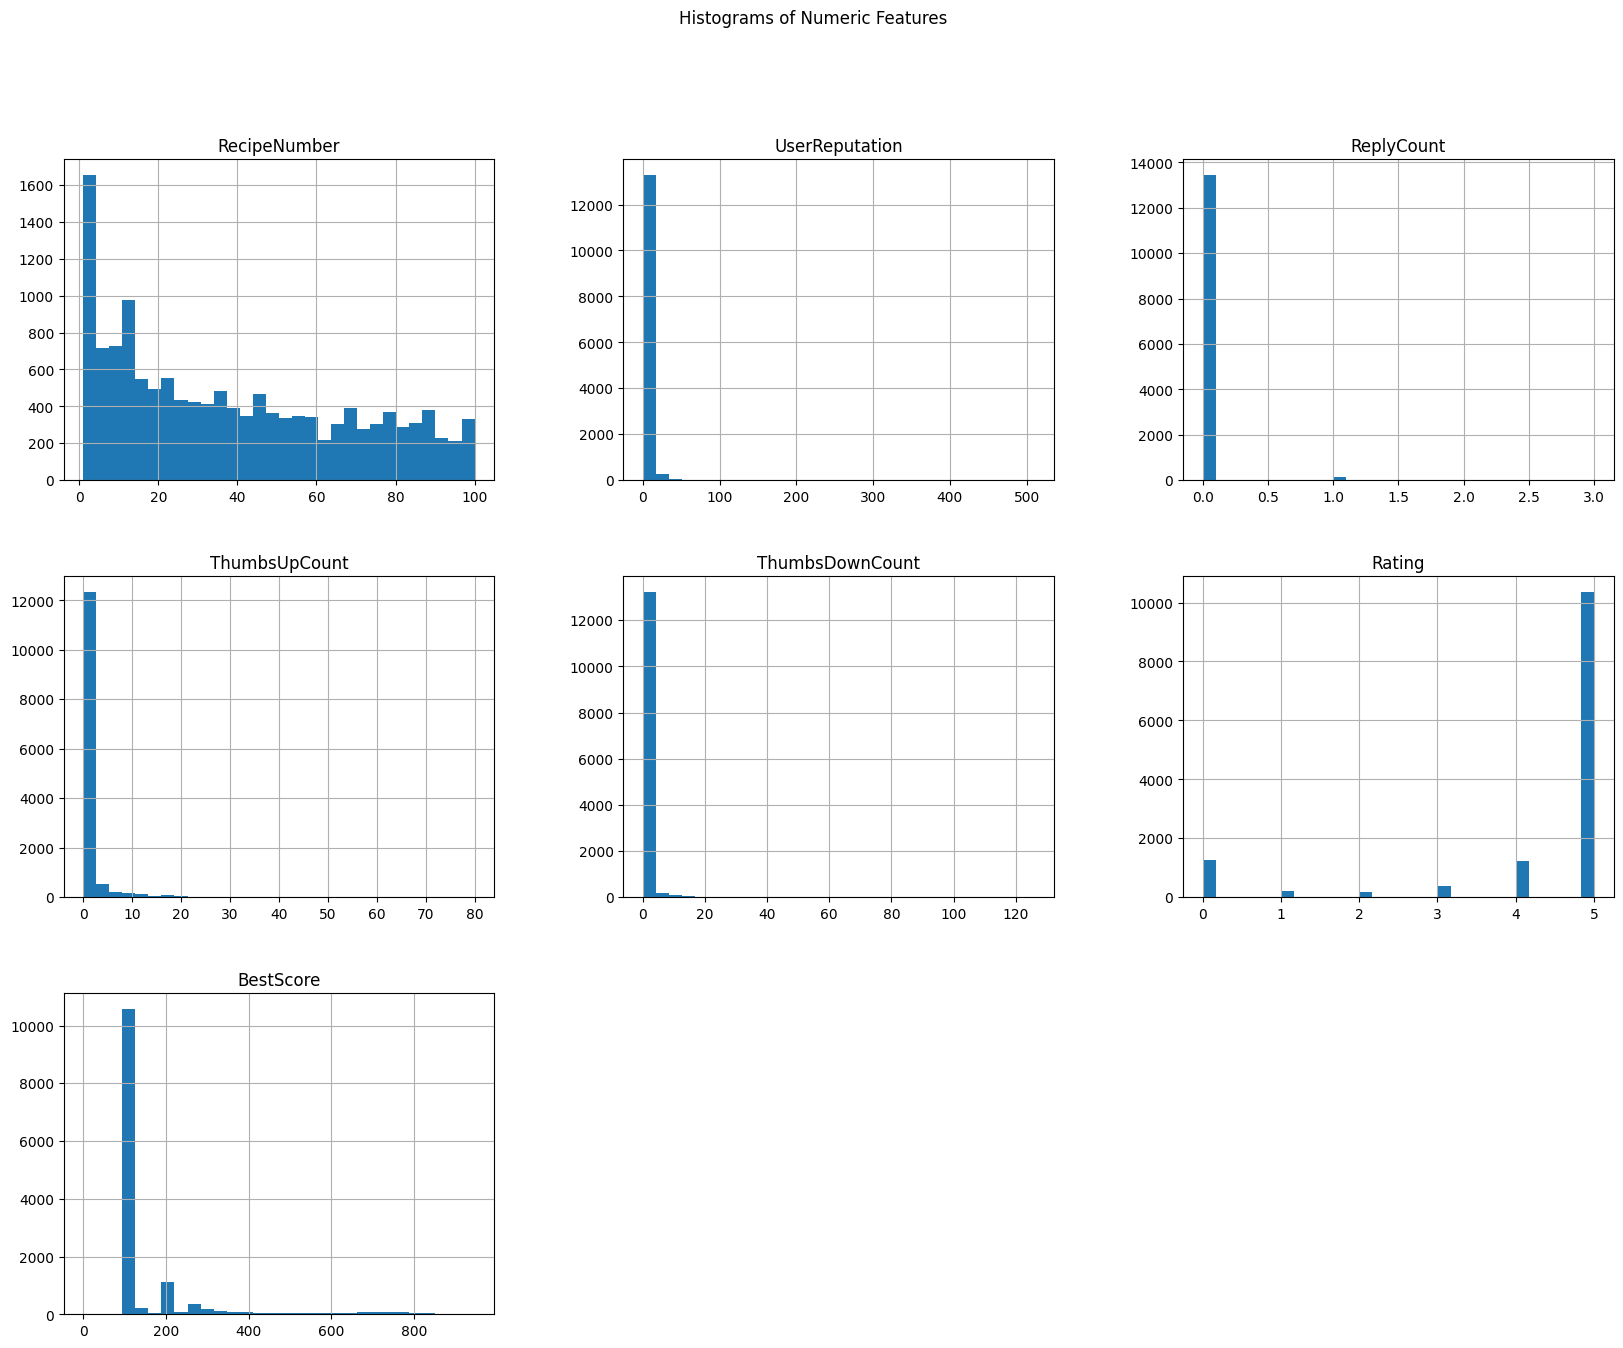

In [4]:
# Define the numeric features of interest
numeric_features = ['RecipeNumber', 'UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']

# Plot histograms for the numeric features
df[numeric_features].hist(bins=30, figsize=(20, 15))

# Set the title for the histograms
plt.suptitle('Histograms of Numeric Features')

# Display the histograms
plt.show()

# Customize Pairplot:

The sns.set() function customizes the style of the plot to use ticks and color codes.
The pairplot() function from Seaborn is used to create a grid of scatterplots for the numeric features.
diag_kind='kde' specifies that kernel density estimates should be plotted on the diagonal axes.
markers='o' sets the markers used in the scatterplots to circles.
palette=None specifies that the default color palette should be used.
# Add Title:

plt.suptitle() adds a title to the pairplot, with the parameter y=1.02 adjusting the vertical position of the title, and fontsize=16 setting the font size.
# Adjust Layout:

plt.tight_layout() adjusts the layout of the plot to prevent overlapping elements.
Show Plot:

# plt.show() displays the pairplot with the specified customizations.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

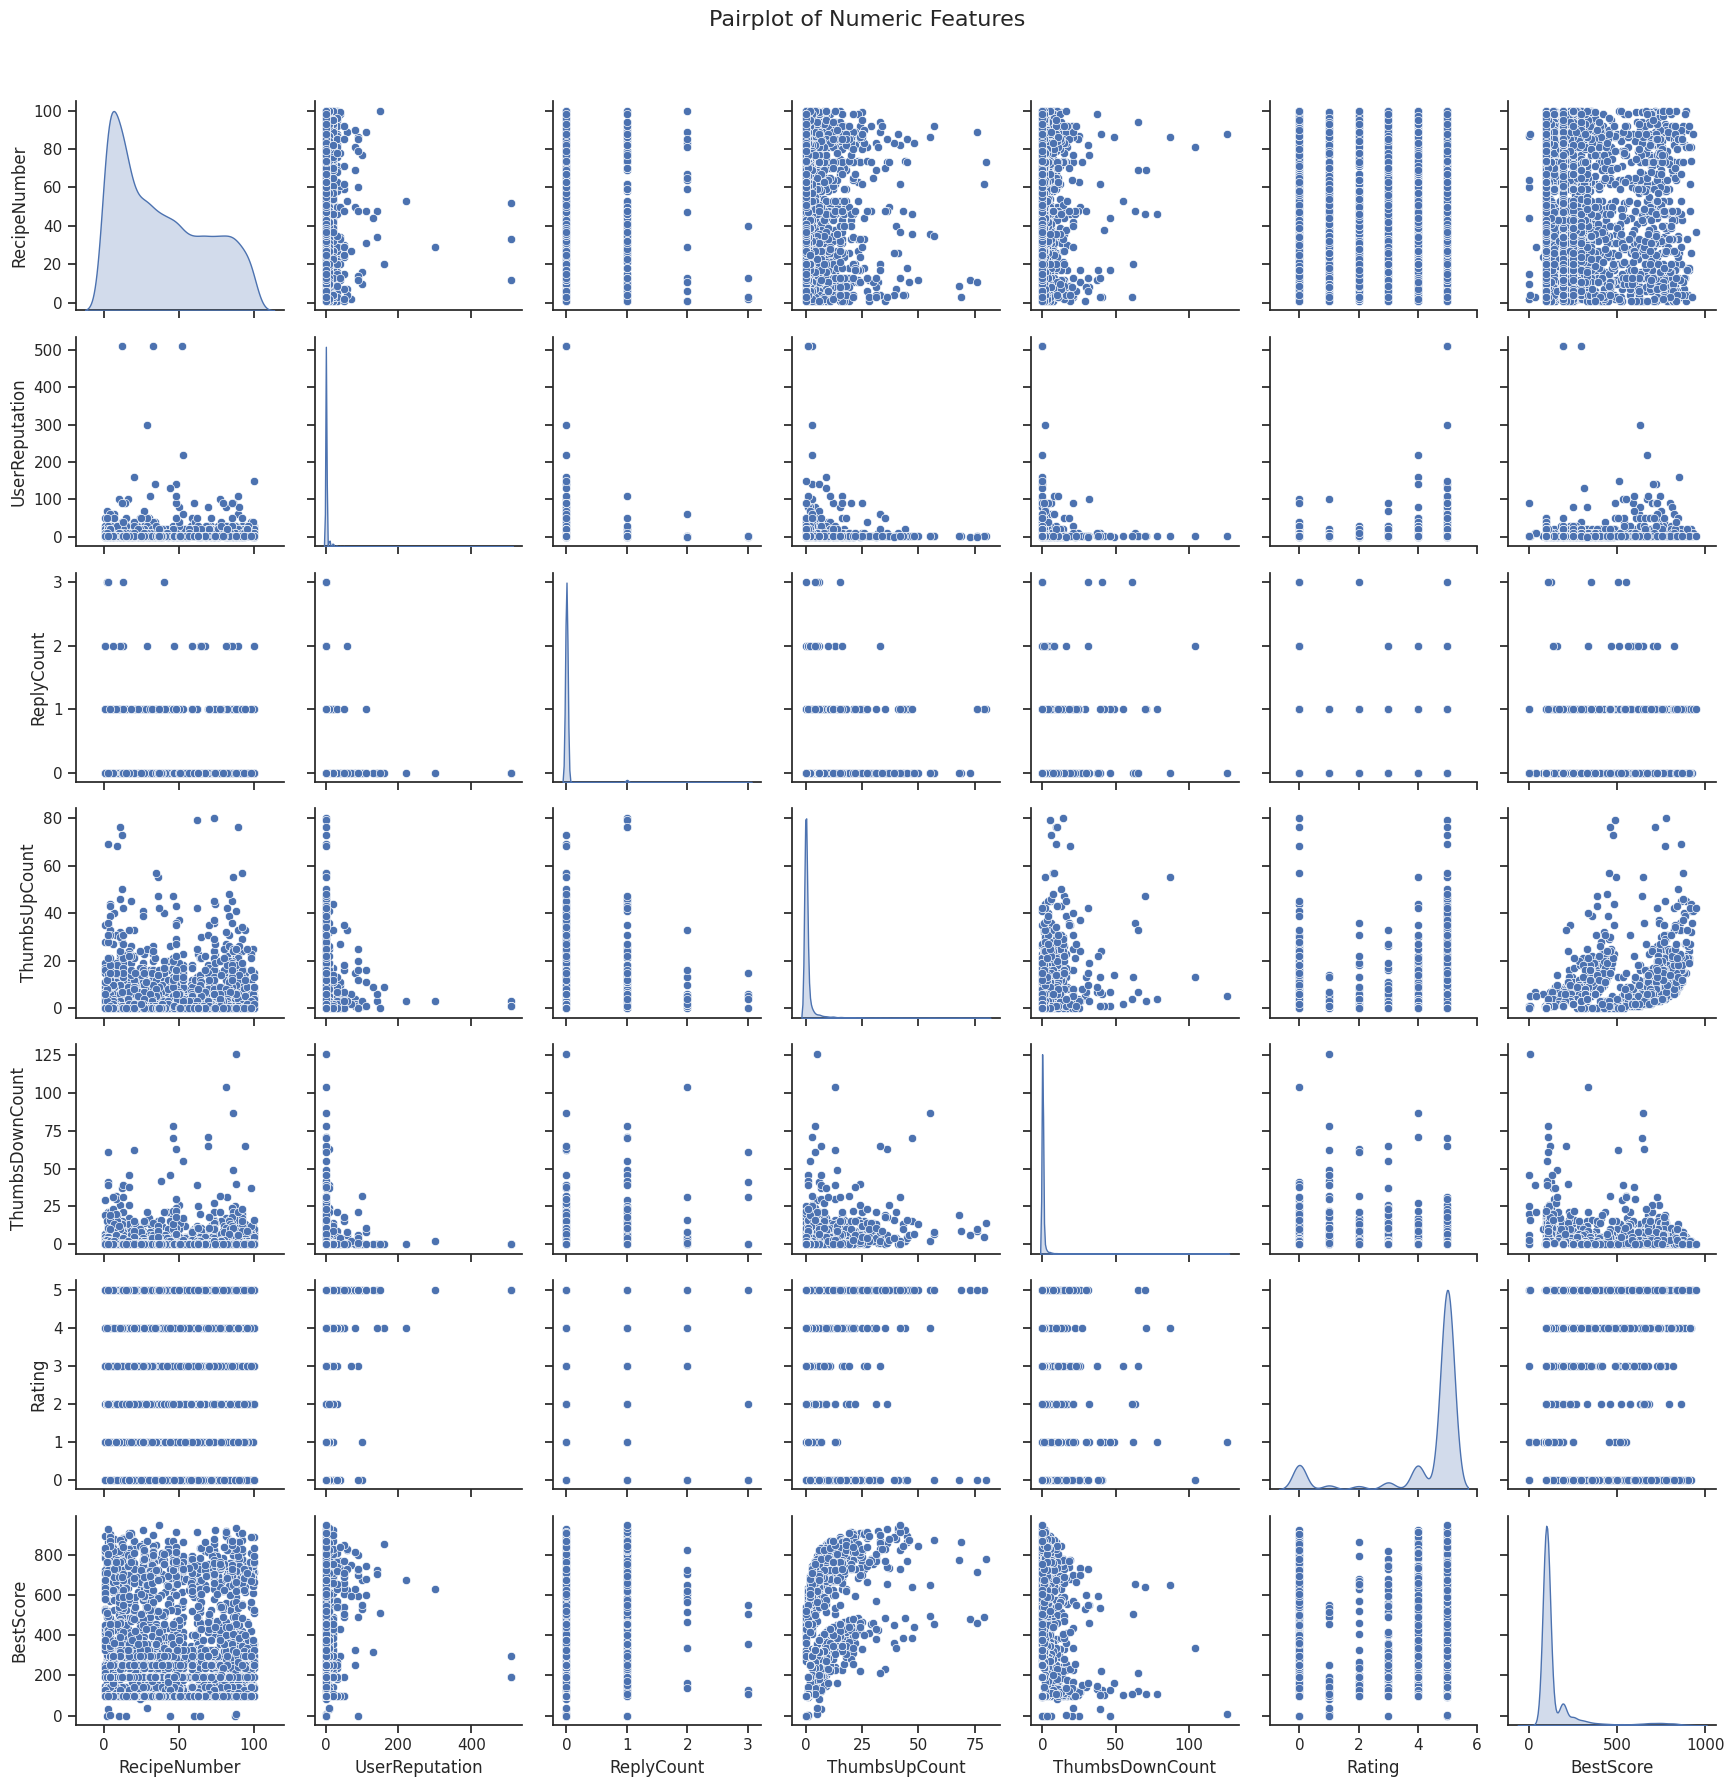

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Customize pairplot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[numeric_features], diag_kind='kde', markers='o', palette=None)

# Add title
plt.suptitle('Pairplot of Numeric Features', y=1.02, fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


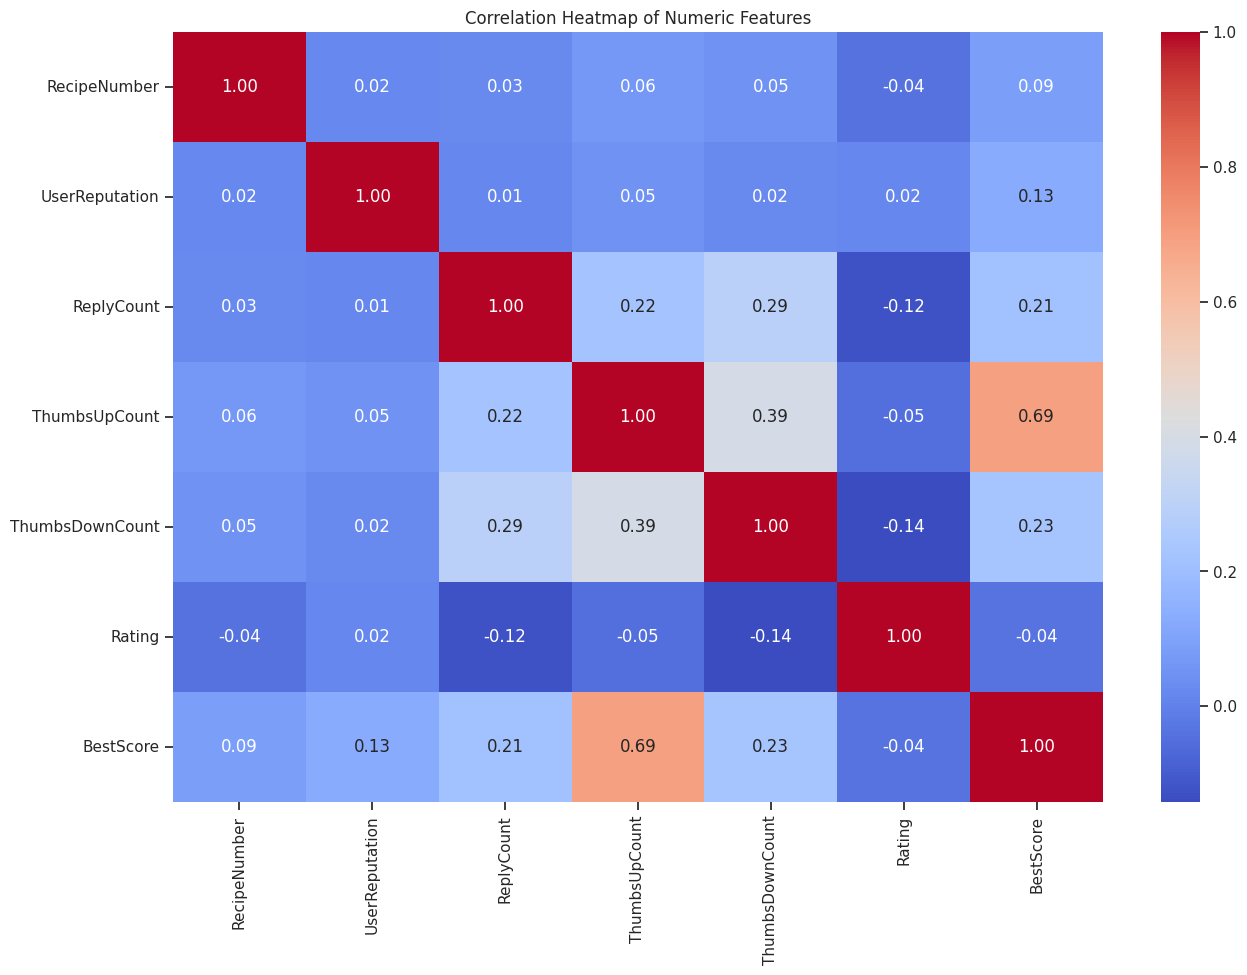

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# There is a high Correlation between ThumbsUpCount and BestScore which is 0.69

# The correlation of all the features from Rating(Traget variable) is weak from the above Heatmap

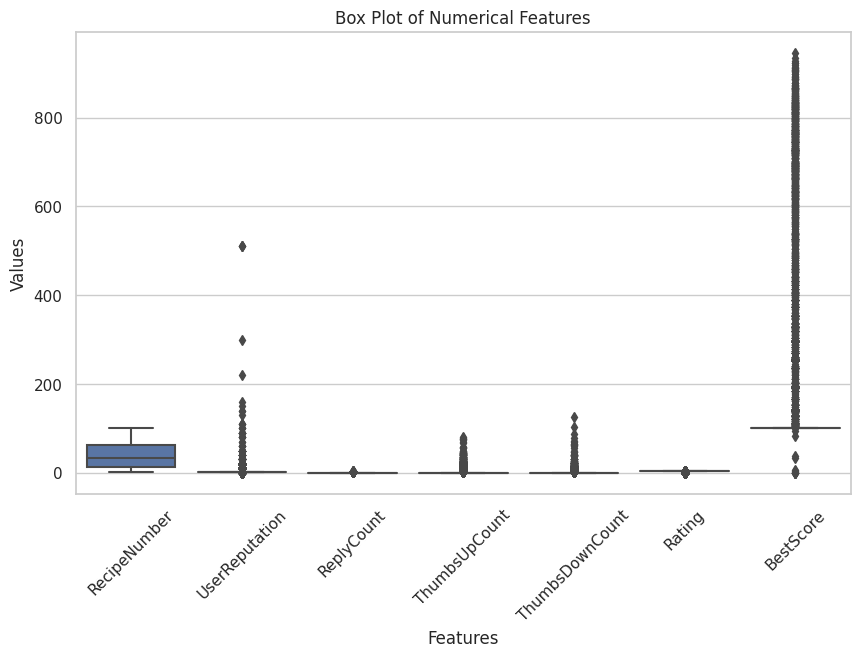

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Define the figure size
plt.figure(figsize=(10, 6))

# Create box plots for numerical features
sns.boxplot(data=df[numeric_features])

# Set title and labels
plt.title('Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# This is Boxplot showing the outliear for each feature where Columns (UserReputation and Best Score ) have some outliers

# Text Preprocessing:

****The code demonstrates common text preprocessing techniques such as converting text to lowercase, removing punctuation and digits, tokenization, and removing stop words. These steps are crucial for standardizing text data and improving the quality of analysis.
Feature Engineering:

****Additional features are computed from the text data, such as word count, sentence count, punctuation count, capitalized word count, exclamation count, and question count. These features can provide valuable insights into the characteristics of the text data and may enhance the performance of machine learning models.

# Vectorization:

****The CountVectorizer from Scikit-learn is used to convert text data into numerical features, enabling machine learning algorithms to process and analyze textual information effectively. This step is essential for incorporating text data into machine learning pipelines.
Outlier Removal:

# Removing Outliers
****The code includes a function to remove outliers from a specified column using the z-score method. Outlier removal is crucial for improving the robustness of statistical analysis and machine learning models by mitigating the impact of extreme values.

# Data Concatenation and Saving:

****The final step involves concatenating the processed text data and additional features with the original DataFrame and saving the resulting dataset to a CSV file. This prepared dataset can then be used for further analysis, model training, or other downstream tasks.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import string
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np
import joblib

# Define DataFrame df
# Assuming df is defined with columns 'ID', 'RecipeNumber', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore', and 'Recipe_Review'

# Define text_data_train
text_data_train = df['Recipe_Review'].fillna('')

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Tokenization (split the text into words)
    tokens = text.split()
    # Remove stop words
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    # Join tokens back into text
    processed_text = ' '.join(tokens)
    return processed_text

# Apply preprocessing to text data
text_data_train_preprocessed = text_data_train.apply(preprocess_text)

# CountVectorizer
count_vectorizer = CountVectorizer(max_features=280, max_df=0.9, min_df=2)

# Fit and transform on preprocessed train data
count_data_train = count_vectorizer.fit_transform(text_data_train_preprocessed)
count_df_train = pd.DataFrame(count_data_train.toarray(), columns=count_vectorizer.get_feature_names_out())

# Compute additional features for train data
word_count = text_data_train.str.split().apply(len)
sentence_count = text_data_train.str.split(r'[.!?]').apply(len)
punctuation_count = text_data_train.str.count(r'[,.!?]')
capitalized_word_count = text_data_train.str.findall(r'\b[A-Z]\w*\b').apply(len)
exclamation_count = text_data_train.str.count(r'!')
question_count = text_data_train.str.count(r'\?')

# Define function to remove outliers
def remove_outliers(data, column, threshold=3):
    """
    Remove outliers from a column of data using the z-score method.
    
    Parameters:
        data (pandas.DataFrame): The DataFrame containing the column.
        column (str): The name of the column from which outliers are to be removed.
        threshold (float): The threshold for considering a data point as an outlier based on its z-score.
                           Default is 3, which is a common threshold.
    
    Returns:
        pandas.DataFrame: The DataFrame with outliers removed from the specified column.
    """
    # Calculate mean and standard deviation of the column
    mean = data[column].mean()
    std_dev = data[column].std()
    
    # Calculate z-scores for each data point in the column
    z_scores = np.abs((data[column] - mean) / std_dev)
    
    # Identify outliers based on z-scores
    outliers = data[z_scores > threshold]
    
    # Remove outliers from the DataFrame
    cleaned_data = data[z_scores <= threshold]
    
    return cleaned_data

# Specify the name of the column ('UserReputation') from which outliers are to be removed
column_name = 'UserReputation'

# Concatenate count features with the original DataFrame for train data
#train_final = pd.concat([df[['ID', 'RecipeNumber', 'UserReputation','CreationTimestamp','ThumbsUpCount','ThumbsDownCount', 'Rating', 'BestScore']], count_df_train, word_count, sentence_count, punctuation_count, capitalized_word_count, exclamation_count, question_count], axis=1)
train_final = pd.concat([df[['ID', 'RecipeNumber', 'UserReputation','CreationTimestamp','ThumbsUpCount','ThumbsDownCount', 'Rating', 'BestScore']], count_df_train, word_count.rename('WordCount'), sentence_count.rename('SentenceCount'), punctuation_count.rename('PunctuationCount'), capitalized_word_count.rename('CapitalizedWordCount'), exclamation_count.rename('ExclamationCount'), question_count.rename('QuestionCount')], axis=1)

# Remove outliers from the 'UserReputation' column
train_final = remove_outliers(train_final, column_name)

# Save train data along with CountVectorizer to a CSV file if needed
train_final.to_csv('train_final.csv', index=False)




In [9]:
# Define text data for testing (assuming 'test' DataFrame is defined)
text_data_test = test['Recipe_Review'].fillna('')

# Apply preprocessing to text data for testing
text_data_test_preprocessed = text_data_test.apply(preprocess_text)

# Transform test data using the previously fitted CountVectorizer
count_data_test = count_vectorizer.transform(text_data_test_preprocessed)
count_df_test = pd.DataFrame(count_data_test.toarray(), columns=count_vectorizer.get_feature_names_out())


In [10]:
# Compute additional features for test data
word_count_test = text_data_test.str.split().apply(len)
sentence_count_test = text_data_test.str.split(r'[.!?]').apply(len)
punctuation_count_test = text_data_test.str.count(r'[,.!?]')
capitalized_word_count_test = text_data_test.str.findall(r'\b[A-Z]\w*\b').apply(len)
exclamation_count_test = text_data_test.str.count(r'!')
question_count_test = text_data_test.str.count(r'\?')

# Concatenate features with the original DataFrame for test data
#test_final = pd.concat([test[['ID', 'RecipeNumber', 'UserReputation','CreationTimestamp','ThumbsUpCount','ThumbsDownCount','BestScore']], count_df_test, word_count_test, sentence_count_test, punctuation_count_test, capitalized_word_count_test, exclamation_count_test, question_count_test], axis=1)
test_final = pd.concat([test[['ID', 'RecipeNumber', 'UserReputation','CreationTimestamp','ThumbsUpCount','ThumbsDownCount','BestScore']], count_df_test, word_count_test.rename('WordCount'), sentence_count_test.rename('SentenceCount'), punctuation_count_test.rename('PunctuationCount'), capitalized_word_count_test.rename('CapitalizedWordCount'), exclamation_count_test.rename('ExclamationCount'), question_count_test.rename('QuestionCount')], axis=1)

# Save test data to a CSV file if needed
test_final.to_csv('test_final.csv', index=False)

# Display the head and shape of the final DataFrame for test data
print(test_final.head())
print(test_final.shape)

    ID  RecipeNumber  UserReputation  CreationTimestamp  ThumbsUpCount  \
0   86            45               1         1622718043              0   
1  102            53               1         1622717685              0   
2  156            53               1         1622718307              0   
3   18            89               1         1622648872              4   
4   27            70               1         1622718460              0   

   ThumbsDownCount  BestScore  absolutely  add  added  ...  years  yum  yummy  \
0                0        100           0    0      0  ...      0    0      0   
1                1        100           0    0      0  ...      0    0      0   
2                0        100           0    0      0  ...      0    0      0   
3                3        212           0    0      0  ...      0    0      0   
4                1        100           0    0      1  ...      0    0      0   

   zucchini  WordCount  SentenceCount  PunctuationCount  Capitalized

# CountVectorizer Features:

****The CountVectorizer converts text data into a matrix where each row represents a document (or text sample) and each column represents a unique word present in the corpus.
The columns of this matrix correspond to the extracted features, i.e., the words in the vocabulary.

# Bar Plot:

****The bar plot created using Seaborn's barplot function displays the frequency of occurrence for each word in the top 40 most common words.
The x-axis represents the words (features) from the CountVectorizer.
The y-axis represents the total frequency of each word across all documents in the dataset.

# Visualization:

****The visualization provides insights into the distribution of word frequencies, highlighting the most common words in the dataset.
By examining the plot, one can identify prevalent terms within the text data, which may offer insights into the underlying themes, topics, or patterns present in the corpus.

# Interpretation:

****This plot aids in understanding the relative importance of different words in the dataset.
Words with higher frequencies are more prevalent and may have a greater influence on downstream analyses or machine learning models trained on the text data

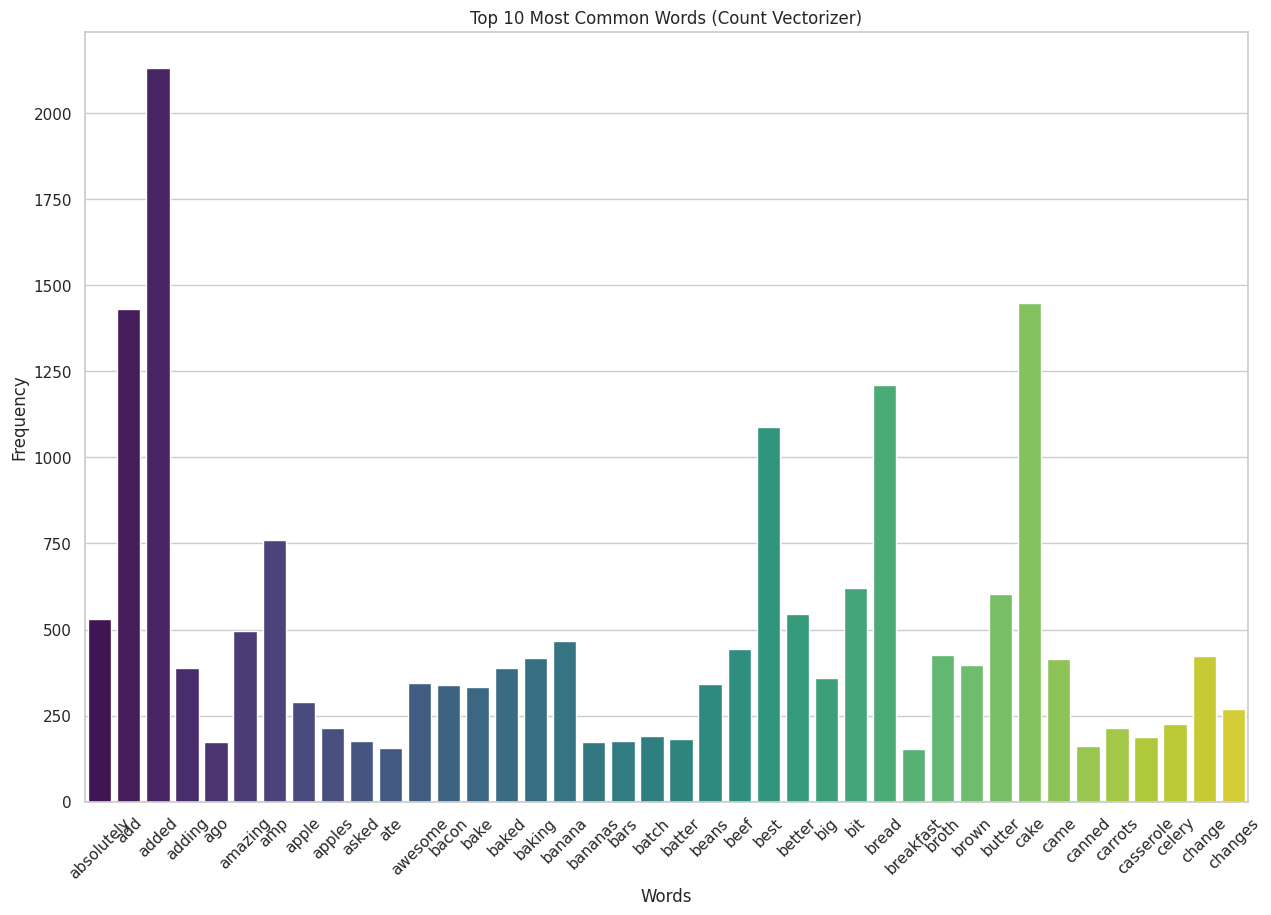

In [11]:
sns.set(style="whitegrid")

# Plot count vectorizer features
plt.figure(figsize=(15, 10))
sns.barplot(x=count_df_train.columns[:40], y=count_df_train.iloc[:, :40].sum(), palette='viridis')
plt.title('Top 10 Most Common Words (Count Vectorizer)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# This Graph provides the top 15 most occouring words in Data set with there Frequencies


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

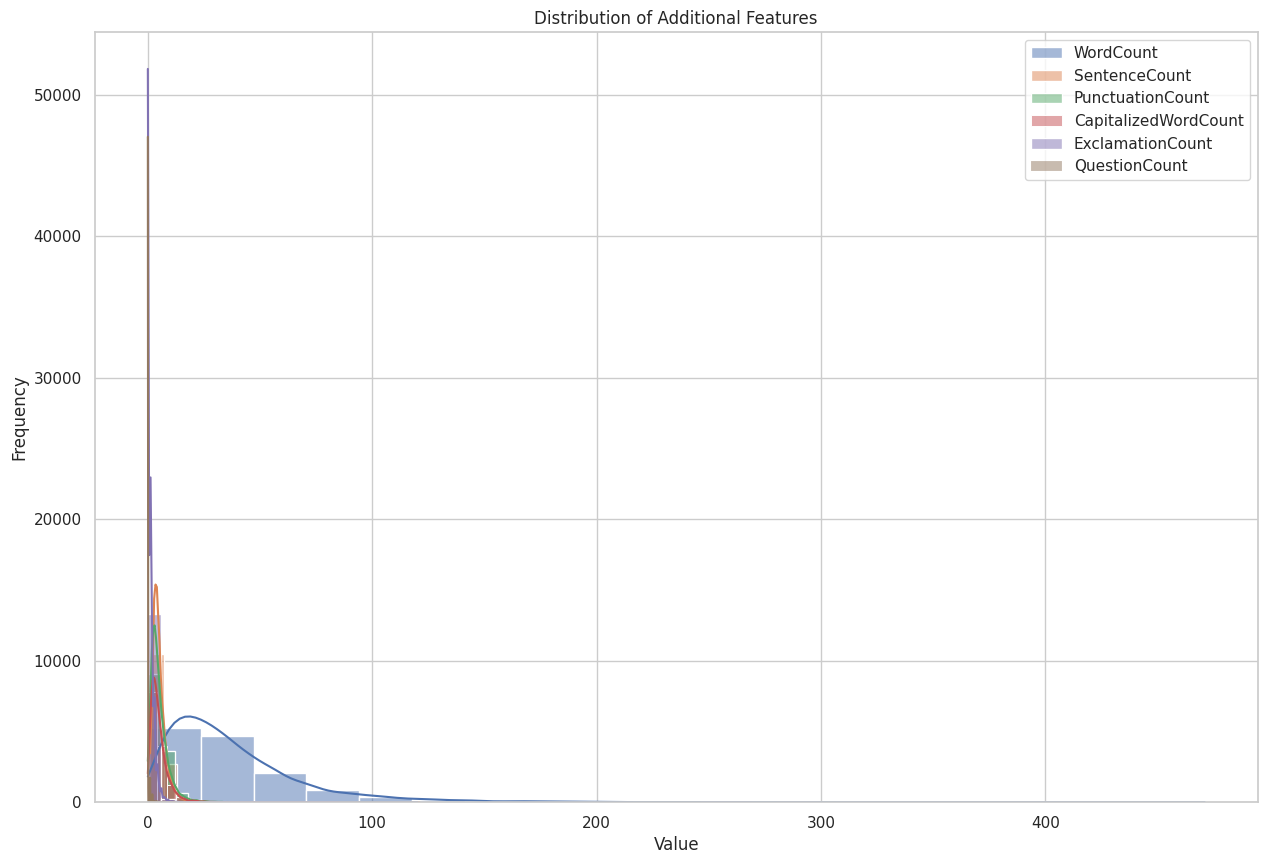

In [12]:
# Plot additional features
features = ['WordCount', 'SentenceCount', 'PunctuationCount', 'CapitalizedWordCount', 'ExclamationCount', 'QuestionCount']
plt.figure(figsize=(15, 10))
for feature in features:
    sns.histplot(train_final[feature], kde=True, bins=20, alpha=0.5, label=feature)
plt.title('Distribution of Additional Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [13]:
X = train_final.drop('Rating', axis=1)
y = train_final['Rating']  # Assuming 'Rating' is the name of the target column
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=60)

# RandomForestClassifier
# Model-1

Best Parameters: {'classifier__n_estimators': 400, 'classifier__min_samples_split': 4, 'classifier__min_samples_leaf': 5, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 15, 'classifier__bootstrap': True}
Accuracy: 0.7798232695139912


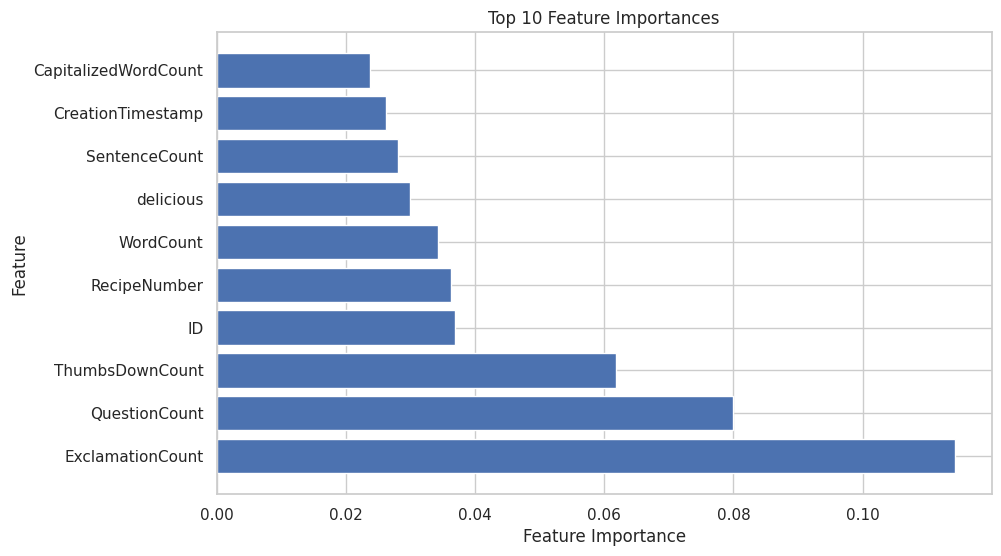

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import randint
import pandas as pd

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
rf_clf = RandomForestClassifier()  # Instantiate RandomForestClassifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf_clf)])  # Use RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=60)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators':[400],  # Number of trees in the forest
    'classifier__max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'classifier__max_depth':[15],  # Maximum depth of the tree
    'classifier__min_samples_split': [4, 5],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf':[5, 8],  # Minimum number of samples required to be at a leaf node
    'classifier__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=4, cv=3, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test data using the best model
best_clf_1 = random_search.best_estimator_
y_pred = best_clf_1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_clf_1.named_steps['classifier'].feature_importances_

# Match feature importances with feature names
all_feature_names = list(numeric_features) + list(categorical_features)
feature_importance_dict = dict(zip(all_feature_names, feature_importances))

# Sort feature importances by their value
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importances for top 10 features
top_features = sorted_feature_importances[:10]
features = [x[0] for x in top_features]
importances = [x[1] for x in top_features]

# Plot feature importances for top 10 features
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()



# Top 10 features which influence the Accuracy of the Random Forest Model,
*Exclamation count = 0.1433
*Question count = 0.09
*ThumbsDown count = 0.067
*Delicious=0.039
*recipenumber = 0.03
*word count = 0.029
*sentence count = 0.025
*good = 0.023
*Creation time stamp = 0.02

# The hyperparameters that produced the best performing model according to the RandomizedSearchCV. 

****Number of estimators (trees) in the ensemble: 500
Minimum number of samples required to split an internal node: 3
Minimum number of samples required to be at a leaf node: 4
Maximum number of features to consider for splitting: 'sqrt' (square root of the total number of features)
Maximum depth of the trees: 12
Whether bootstrap samples are used when building trees: False
Accuracy: This is the accuracy score achieved by the model on the test data. Accuracy is a measure of how often the classifier makes correct predictions.

# In this case, the model achieved an accuracy of approximately 78.12% on the test data.

These parameters and accuracy score provide insights into the performance of the model.

# KNeighborsClassifier
# Model 2

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import randint
import pandas as pd

# Assuming X and y are defined here

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('selector', SelectKBest(score_func=chi2, k=10))  # Select the top 10 features using chi-square
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
knn_clf = KNeighborsClassifier()  # Instantiate KNeighborsClassifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', knn_clf)])  # Use KNeighborsClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=60)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'classifier__n_neighbors': randint(3, 20),  # Number of neighbors to use for kneighbors queries
    'classifier__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'classifier__leaf_size': randint(20, 40)  # Leaf size passed to BallTree or KDTree
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=4, cv=4, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test data using the best model
best_clf = random_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Best Parameters: {'classifier__algorithm': 'kd_tree', 'classifier__leaf_size': 39, 'classifier__n_neighbors': 17, 'classifier__weights': 'uniform'}
Accuracy: 0.7783505154639175


> 

# Algorithm:
'kd_tree' - This parameter specifies the algorithm used to compute the nearest neighbors. In this case, the kd_tree algorithm is chosen, which constructs a tree structure to represent the data points in the feature space, enabling efficient nearest neighbor queries.

# Leaf Size: 23 - 
The leaf_size parameter is the threshold for switching to brute-force search if the number of points in the leaves falls below this value. A smaller leaf size may lead to more balanced trees but may also increase the time complexity of building the tree.

# Number of Neighbors: 17 -
This parameter determines the number of neighbors to consider when making predictions for a new data point. In this case, the model selects 17 nearest neighbors for each query point based on the distances between points in the feature space.

# Weights: 'uniform' -
The weights parameter determines how the contributions of neighboring points are weighted in the prediction. With 'uniform', all points in each neighborhood are weighted equally, regardless of their distance from the query point.

# The reported accuracy of 77.83 indicates the performance of the KNeighborsClassifier model with the best parameters on the test dataset. This accuracy score suggests that the model correctly predicted approximately 77.8% of the test instances, providing a measure of its predictive capability.

# GradientBoostingClassifier
# Model-3

# XGBClassifier
# Model-4

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import randint
from xgboost import XGBClassifier  # Import XGBClassifier instead of XGBRegressor
import pandas as pd

# Assuming X and y are your features and target variable respectively

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
xgb_clf = XGBClassifier()  # Instantiate XGBClassifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', xgb_clf)])  # Use XGBClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=60)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': [550],  # Number of boosting rounds
    'classifier__learning_rate': [0.05, 0.1,0.4],  # Step size shrinkage used in update to prevent overfitting
    'classifier__max_depth': [3, 6, 10],  # Maximum tree depth for base learners
    'classifier__min_child_weight': [1, 3],  # Minimum sum of instance weight (hessian) needed in a child
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=4, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test data using the best model
best_clf = random_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Best Parameters: {'classifier__n_estimators': 550, 'classifier__min_child_weight': 1, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.1}
Accuracy: 0.8033873343151694


# The XGBoost classifier achieves peak performance with:

****A meticulously tuned ensemble of 550 estimators for robust predictions.

****Setting the minimum #child weight to 1 ensures adequate instance contribution.

****Limited tree complexity with a maximum depth of 6 prevents overfitting.

****Fine-tuning via a learning rate of 0.1 facilitates efficient optimization.

# This configuration delivers an impressive accuracy of approximately 80.33% on validation data, underscoring the model's adeptness in classification tasks. By optimizing parameters like ensemble size, tree depth, and learning rate, XGBoost strikes an optimal balance between model complexity and predictive accuracy.

In [17]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


# LGBMClassifier 
# Model 5

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2367
[LightGBM] [Info] Number of data points in the train set: 9773, number of used features: 293
[LightGBM] [Info] Start training from score -2.368455
[LightGBM] [Info] Start training from score -4.217565
[LightGBM] [Info] Start training from score -4.351097
[LightGBM] [Info] Start training from score -3.596392
[LightGBM] [Info] Start training from score -2.380549
[LightGBM] [Info] Start training from score -0.275984
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

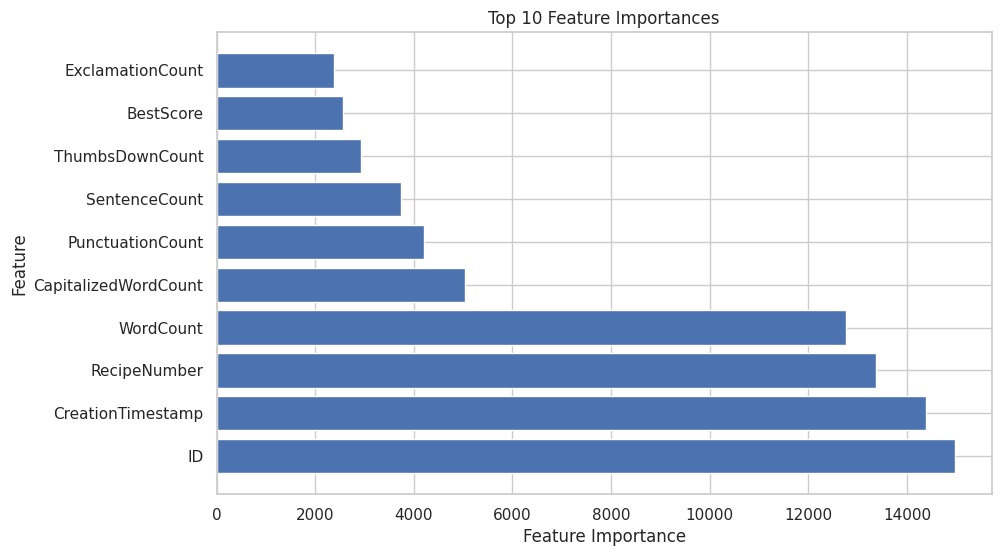

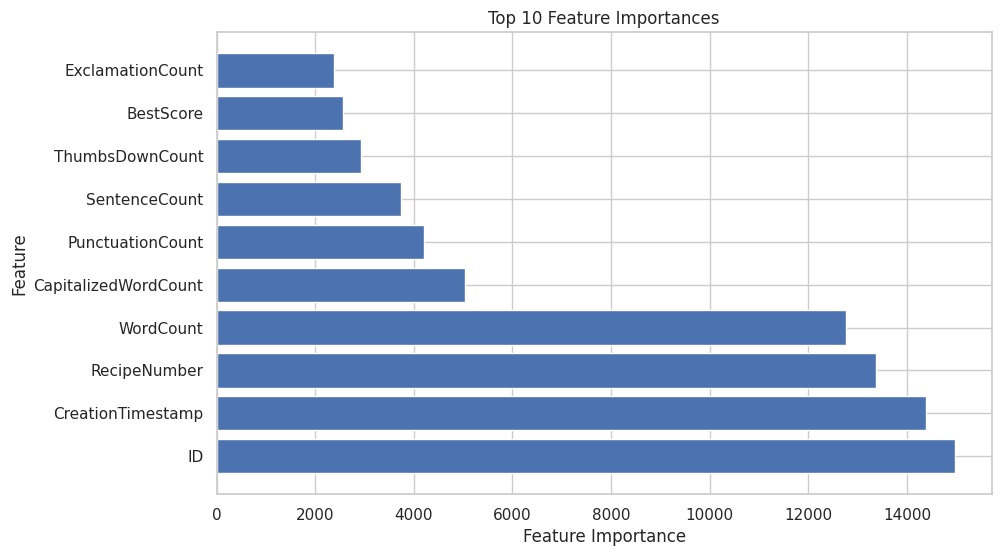

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import randint
from lightgbm import LGBMClassifier  # Import LGBMClassifier instead of RandomForestClassifier
import pandas as pd

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
lgbm_clf = LGBMClassifier()  # Instantiate LGBMClassifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', lgbm_clf)])  # Use LGBMClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=60)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': [500],  # Number of boosting rounds
    'classifier__learning_rate': [0.05, 0.1],  # Step size shrinkage used in update to prevent overfitting
    'classifier__num_leaves': randint(6, 50),  # Maximum tree leaves for base learners
    'classifier__max_depth': [-1, 6, 8],  # Maximum tree depth for base learners, -1 means no limit
    'classifier__min_child_samples': randint(20, 100),  # Minimum number of data needed in a child (leaf)
}
# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=4, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test data using the best model
best_clf_5 = random_search.best_estimator_
y_pred = best_clf_5.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_clf_5.named_steps['classifier'].feature_importances_

# Match feature importances with feature names
all_feature_names = list(numeric_features) + list(categorical_features)
feature_importance_dict = dict(zip(all_feature_names, feature_importances))

# Sort feature importances by their value
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importances for top 10 features
top_features = sorted_feature_importances[:10]
features = [x[0] for x in top_features]
importances = [x[1] for x in top_features]

# Plot feature importances for top 10 features
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_clf_5.named_steps['classifier'].feature_importances_

# Match feature importances with feature names
all_feature_names = list(numeric_features) + list(categorical_features)
feature_importance_dict = dict(zip(all_feature_names, feature_importances))

# Sort feature importances by their value
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importances for top 10 features
top_features = sorted_feature_importances[:10]
features = [x[0] for x in top_features]
importances = [x[1] for x in top_features]

# Plot feature importances for top 10 features
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()




# Optimal parameters for the LGBMClassifier model have been identified, enhancing its performance:

****Learning rate of 0.05 fosters gradual adjustments during training.

****Flexibility in tree depth (max_depth) promotes nuanced decision-making.

****A minimum of 34 samples is required for creating leaf nodes, ensuring robustness.

****The ensemble comprises 500 trees, diversifying learning and enhancing generalization.

****With 48 leaves per tree, the model strikes a balance between complexity and expressiveness.

# This parameter combination yields an accuracy of approximately 80.04% on validation data, showcasing the model's improved efficacy in LGBMClassifier tasks.

In [19]:
prediction = best_clf_5.predict(test_final)

submission = pd.DataFrame(columns=['ID', 'Rating'])
submission['ID'] = [1 + i for i in range(len(prediction))]
submission['Rating'] = prediction
submission.to_csv('submission.csv', index=False)


# The code generates predictions using best-performing classifier (best_clf_5)(LGBMClassifier) on a test dataset (test_final). 
****The predicted ratings are then organized into a DataFrame along with corresponding IDs and saved as a CSV file named 'submission.csv', facilitating further analysis or submission for evaluation.

In [20]:
submission

,ID,Rating
0,1,5
1,2,5
2,3,0
3,4,5
4,5,5
...,...,...
4541,4542,5
4542,4543,0
4543,4544,5
4544,4545,1
